In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [43]:
test6 = cv.imread('test6.jpg', cv.IMREAD_GRAYSCALE)

In [37]:
def histogram(tile):
    hist = np.zeros(256)
    for i in range(tile.shape[0]):
        hist[tile[i]] += 1
    return hist

In [2]:
def limitted_histogram(hist, clip_limit):
    add = 0
    for i in range(len(hist)):
        if hist[i] > clip_limit:
            add+= hist[i] - clip_limit
            hist[i] = clip_limit
    return hist+add/len(hist)

In [39]:
def cdf(hist):
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i-1] + hist[i]
    return cdf

In [84]:
def clahe(img, tile_size, clip_limit):
    border = tile_size // 2
    image = cv.copyMakeBorder(img, border, border, border, border, cv.BORDER_REFLECT)
    return_image = image.copy()
    for i in range(border, image.shape[0] - border):
        for j in range(border, image.shape[1] - border):
            tile = image[i - border:i + border + 1, j - border:j + border + 1]
            tile = tile.flatten()
            tile_hist = histogram(tile)
            tile_hist = limitted_histogram(tile_hist, clip_limit)
            tile_cdf = cdf(tile_hist)
            tile_cdf = tile_cdf * 255 / tile_cdf[-1]
            return_image[i, j] = tile_cdf[image[i, j]]
            """cdf_norm = (tile_hist.cumsum() / (tile_size**2))*256
            return_image[i,j] = cdf_norm[image[i,j]]"""
    return return_image[border:-border, border:-border]

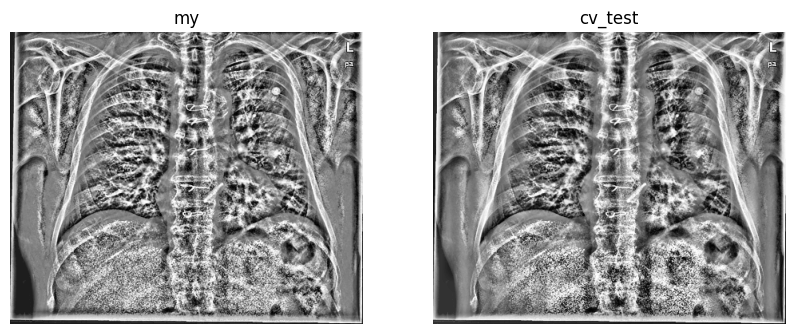

In [88]:
my_clahe = clahe(test6, 21, 50)

cv_clahe = cv.createCLAHE(clipLimit=50, tileGridSize=(21, 21))
cv_test = cv_clahe.apply(test6)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('my')
plt.imshow(my_clahe, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.title('cv_test')
plt.imshow(cv_test, cmap='gray')
plt.axis('off')
plt.show()


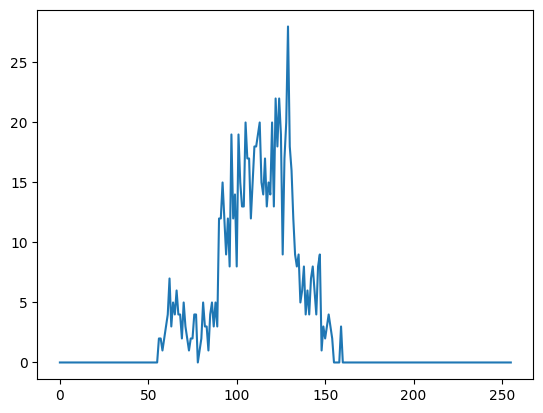

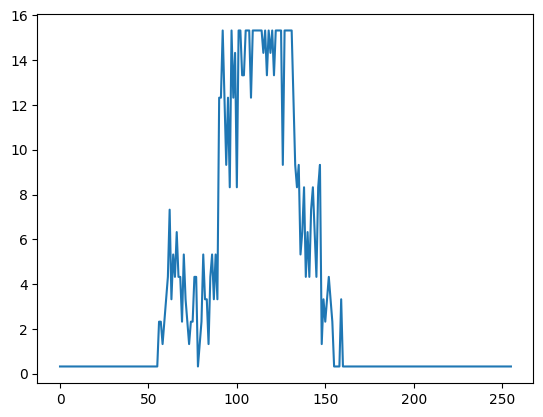

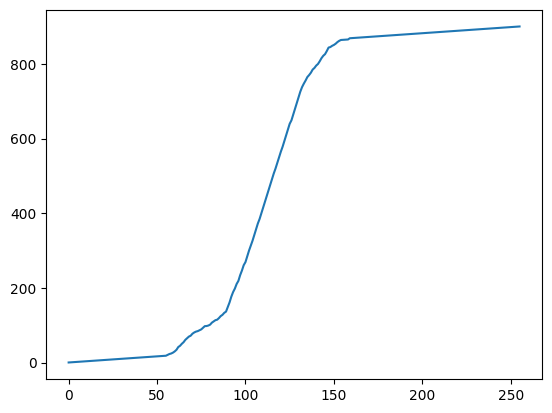

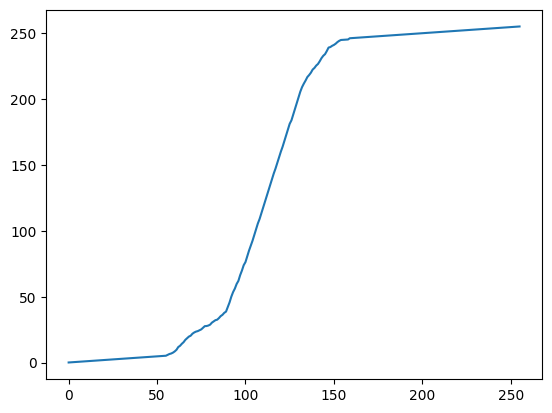

In [81]:
x = test6[20:50, 20:50].flatten()
x = histogram(x)
plt.plot(x)
plt.show()
x = limitted_histogram(x, 15)
plt.plot(x)
plt.show()
x = cdf(x)

plt.plot(x)
plt.show()

x = x * 255 / x[-1]

plt.plot(x)
plt.show()
